In [46]:
# Reading data from csv file using pandas library
import pandas as pd
df = pd.read_csv("Data1.csv")
df

,Unnamed: 0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
0,2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
1,2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2,2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
3,2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
4,2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...,...
1090,2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
1091,2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
1092,2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
1093,2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


In [47]:
# Setting custom columns name
df.columns = ["Date", "Theta1", "Theta2", "Theta3", "Theta4", "Theta5", "Theta6"]
df

,Date,Theta1,Theta2,Theta3,Theta4,Theta5,Theta6
0,2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
1,2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2,2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
3,2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
4,2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...,...
1090,2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
1091,2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
1092,2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
1093,2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


In [48]:
# Setting Date columns as index for table
df = df.set_index("Date")
df

,Theta1,Theta2,Theta3,Theta4,Theta5,Theta6
Date,,,,,,
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...
2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023AE0471708>,
      dtype=object)

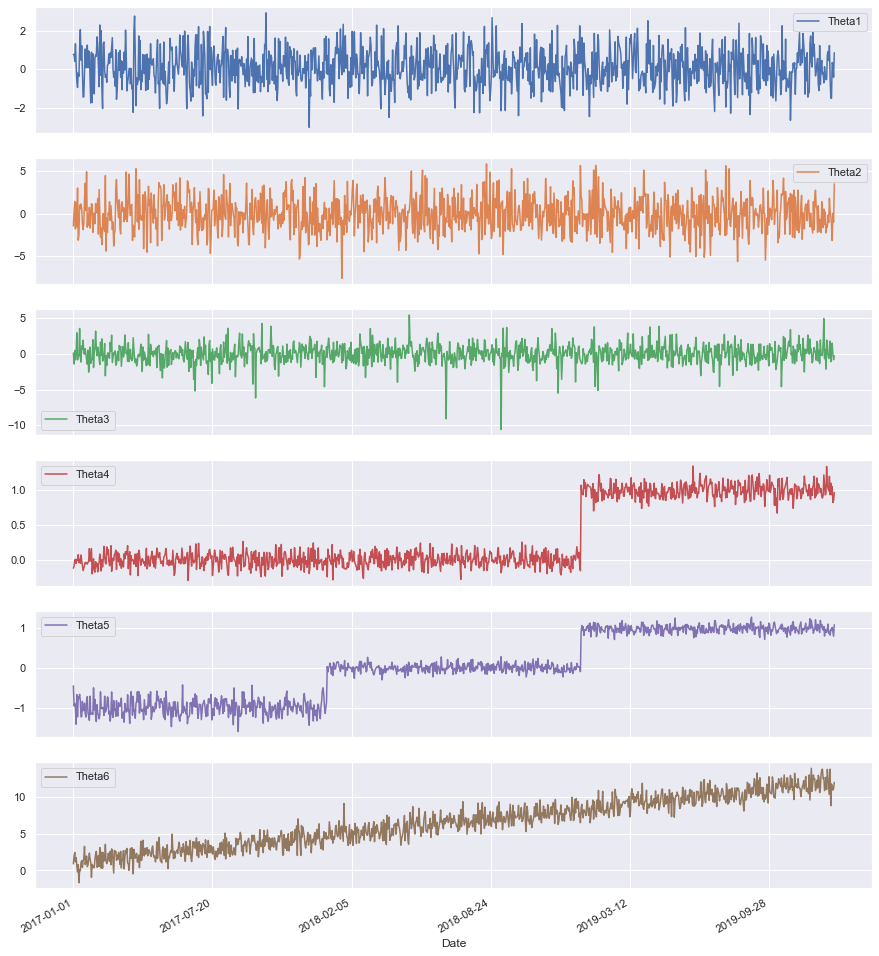

In [49]:
# Figure parameters
height = 3
width = 15
columns = df.columns.array
col_num = len(columns)

# Plotting data, each column in separate subplot, figsize defined by parameters
df.plot(y=df.columns.array, subplots=True, figsize=(width, col_num*height))

In [50]:
# Consolidate dataframe to two columns. One column "variable" describes the variable name, 
# the second column "value" keeps value of variable
df_melted = pd.melt(df)
df_melted

,variable,value
0,Theta1,0.756936
1,Theta1,0.767089
2,Theta1,0.404544
3,Theta1,1.313957
4,Theta1,0.209862
...,...,...
6565,Theta6,11.755980
6566,Theta6,11.397092
6567,Theta6,10.918941
6568,Theta6,11.140722


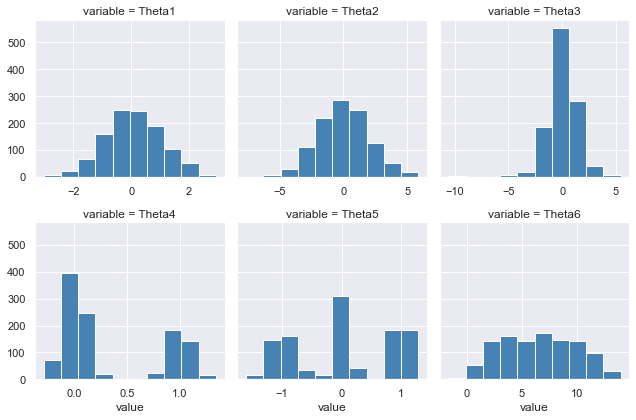

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn background style
sns.set(style="darkgrid")

# Maps a dataset onto multiple axes 
grid = sns.FacetGrid(data=df_melted, col="variable", sharex=False, col_wrap=3, margin_titles=True)
# Apply ploting function - histogram
grid.map(plt.hist, "value", color="steelblue", bins=10)

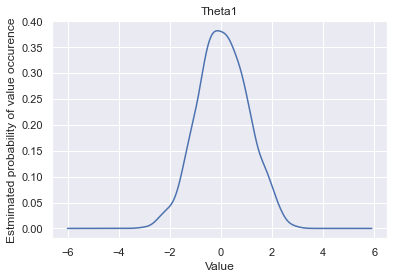

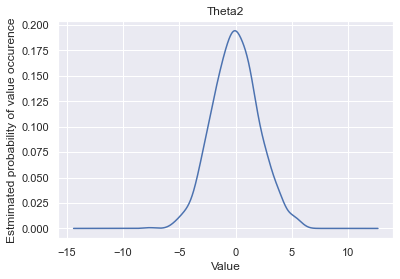

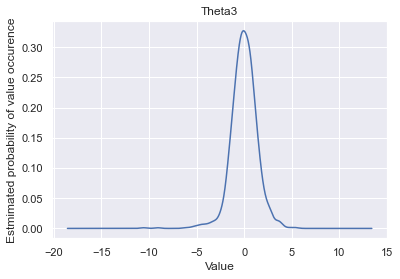

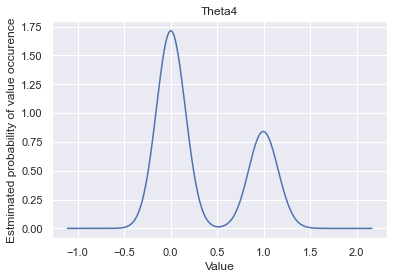

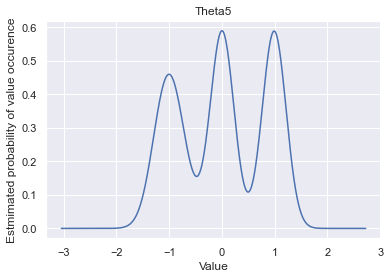

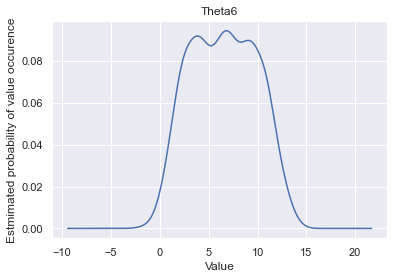

<Figure size 432x288 with 0 Axes>

In [45]:
# Iterate over column name in dataframe
for col_name in df:
    # For each column plot kernel density estimation 
    # This is non parmetric way to estimate the probability density function (PDF) of random variable.
    df[col_name].plot.kde(title=col_name)
    plt.xlabel("Value")
    plt.ylabel("Estmimated probability of value occurence")
    plt.figure()

In [28]:
# Cut data to have only data from 2018 year
df2018 = df['2018-01-01':'2019-01-01']
df2018

,Theta1,Theta2,Theta3,Theta4,Theta5,Theta6
Date,,,,,,
2018-01-01,0.682693,-3.091767,-0.475717,-0.238530,0.036404,4.551359
2018-01-02,-0.283107,-0.979955,1.233933,0.158031,-0.097014,4.623086
2018-01-03,1.572221,-2.033528,2.196317,0.041347,0.009982,4.330249
2018-01-04,-1.042981,0.651530,1.060125,0.064832,0.036592,6.617830
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025,0.124576,5.577570
...,...,...,...,...,...,...
2018-12-28,1.433117,0.325632,0.905920,0.028891,0.040696,9.396884
2018-12-29,0.285428,-0.476290,1.082404,0.111482,0.031700,7.285139
2018-12-30,2.249273,-1.233575,-0.666277,-0.080878,0.004340,7.776090


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023AD7AEF7C8>,
      dtype=object)

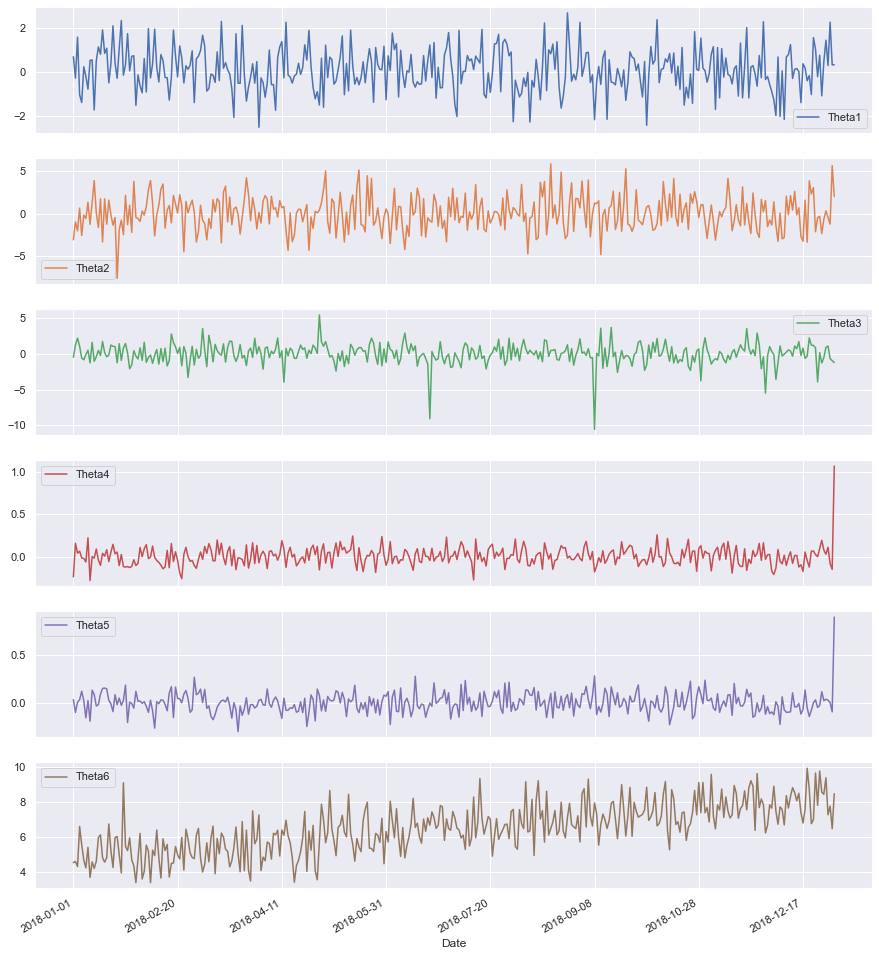

In [27]:
# Plotting data, each column in separate subplot, figsize defined by parameters
df2018.plot(y=df2018.columns.array, subplots=True, figsize=(width, col_num*height))

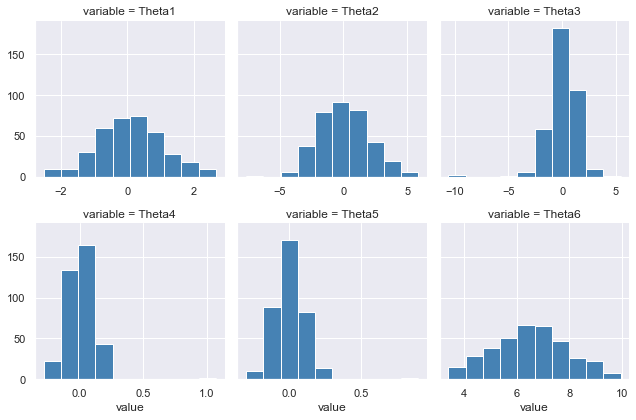

In [30]:
# Consolidate dataframe to two columns. One column "variable" describes the variable name, 
# the second column "value" keeps value of variable
df2018_melted = df2018.melt()
# Maps a dataset onto multiple axes 
grid = sns.FacetGrid(data=df2018_melted, col="variable", sharex=False, col_wrap=3, margin_titles=True)
# Apply ploting function - histogram
grid.map(plt.hist, "value", color="steelblue")

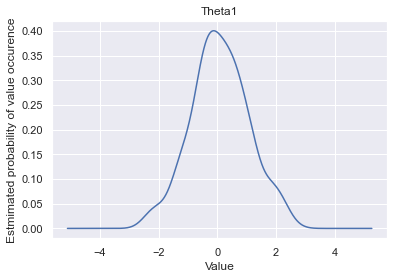

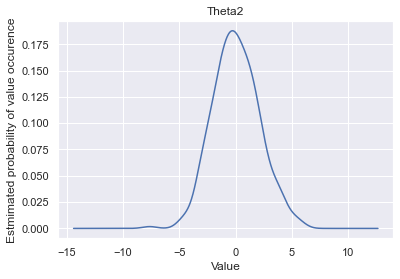

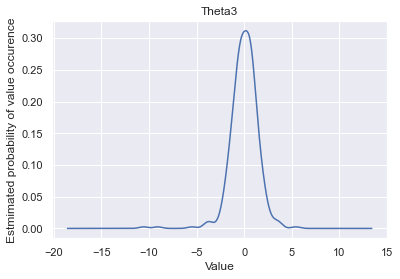

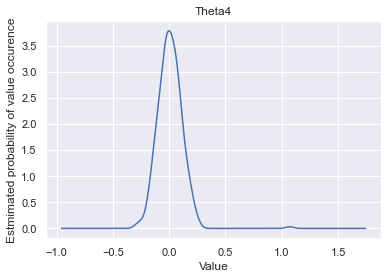

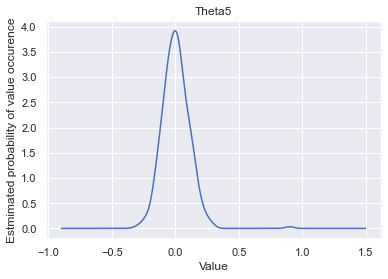

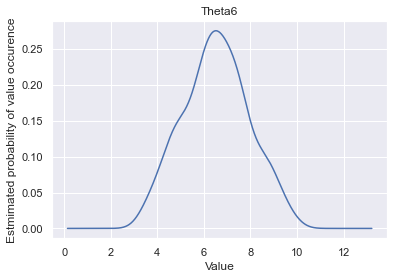

<Figure size 432x288 with 0 Axes>

In [34]:
# Iterate over column name in dataframe
for col_name in df2018:
    # For each column plot kernel density estimation 
    # This is non parmetric way to estimate the probability density function (PDF) of random variable.
    df2018[col_name].plot.kde(title=col_name)
    plt.xlabel("Value")
    plt.ylabel("Estmimated probability of value occurence")
    plt.figure()